In [1]:
from langgraph.types import Command
import os
os.chdir("../")

In [2]:
from interviewBot.graph import build_graph, build_workflow

In [3]:
wf = build_workflow()
compiled_wf = wf.compile()

In [4]:
print("Nodes:", compiled_wf.nodes.keys())

Nodes: dict_keys(['__start__', 'init_sess_node', 'user_verify_interrupt_node', 'user_verify_node', 'questions_node', 'error_handler_node', 'get_answer_node'])


In [5]:
print(compiled_wf.get_graph().draw_mermaid())

---
config:
  flowchart:
    curve: linear
---
graph TD;
	__start__([<p>__start__</p>]):::first
	init_sess_node(init_sess_node)
	user_verify_interrupt_node(user_verify_interrupt_node)
	user_verify_node(user_verify_node)
	questions_node(questions_node)
	error_handler_node(error_handler_node)
	get_answer_node(get_answer_node)
	__end__([<p>__end__</p>]):::last
	__start__ --> init_sess_node;
	error_handler_node -. &nbsp;end_graph&nbsp; .-> __end__;
	error_handler_node -. &nbsp;user_verify_node&nbsp; .-> user_verify_interrupt_node;
	init_sess_node --> user_verify_interrupt_node;
	questions_node --> get_answer_node;
	user_verify_interrupt_node --> user_verify_node;
	user_verify_node -. &nbsp;error_handler&nbsp; .-> error_handler_node;
	user_verify_node -. &nbsp;questions&nbsp; .-> questions_node;
	get_answer_node --> __end__;
	classDef default fill:#f2f0ff,line-height:1.2
	classDef first fill-opacity:0
	classDef last fill:#bfb6fc



In [6]:
from IPython.display import display, Image
from langchain_core.runnables.graph import MermaidDrawMethod

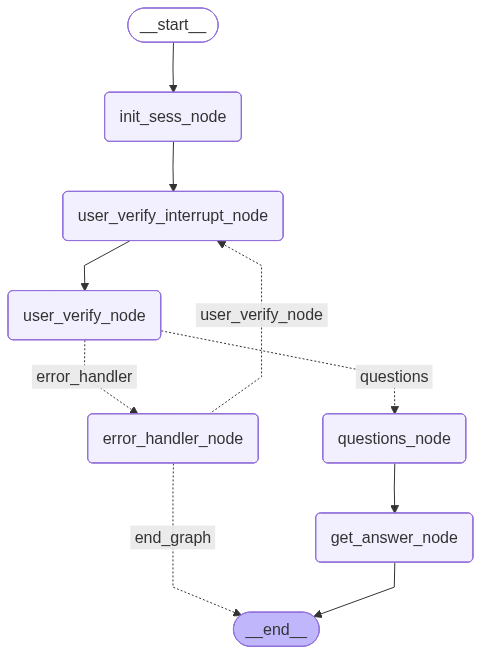

In [7]:
display(
    Image(
        compiled_wf.get_graph().draw_mermaid_png(
            draw_method = MermaidDrawMethod.API
        )
    )
)

In [8]:
compiled = await build_graph()
result = await compiled.ainvoke({}, config={"configurable": {"thread_id": 6}})
print(result)

{'user_id': None, 'verified': None, 'verification_count': 0, 'difficulty': 5, 'question': None, 'expected_answer': None, 'used_topics': [], 'question_count': 0, 'scores': [], 'difficulties': [5], 'clarification_needed': False, 'clarifications_used': 0, 'answers_log': [], 'final_decision': None, '__interrupt__': [Interrupt(value={'message': 'Please enter your Email ID or Employee ID for verification (You will have 2 tries):', 'interrupt_type': 'verification', 'field': 'user_id'}, id='0df0e1253b8c766ba33ae442706d123b')]}


In [9]:
result

{'user_id': None,
 'verified': None,
 'verification_count': 0,
 'difficulty': 5,
 'question': None,
 'expected_answer': None,
 'used_topics': [],
 'question_count': 0,
 'scores': [],
 'difficulties': [5],
 'clarification_needed': False,
 'clarifications_used': 0,
 'answers_log': [],
 'final_decision': None,
 '__interrupt__': [Interrupt(value={'message': 'Please enter your Email ID or Employee ID for verification (You will have 2 tries):', 'interrupt_type': 'verification', 'field': 'user_id'}, id='0df0e1253b8c766ba33ae442706d123b')]}

In [10]:
result = await compiled.ainvoke(
    Command(resume = "rahulrawat2752chd@gmail.com"), 
    config = {"configurable": {"thread_id": 6}}
)


In [11]:
result

{'user_id': 'rahulrawat2752chd@gmail.com',
 'verified': False,
 'verification_count': 1,
 'difficulty': 5,
 'question': None,
 'expected_answer': None,
 'used_topics': [],
 'question_count': 0,
 'scores': [],
 'difficulties': [5],
 'clarification_needed': False,
 'clarifications_used': 0,
 'answers_log': [],
 'final_decision': None,
 '__interrupt__': [Interrupt(value={'message': 'Last chance: Enter either your Email ID or Employee ID correctly.', 'interrupt_type': 'verification', 'field': 'user_id'}, id='57aa65e90564e84d6d45ba4cdaf61174')]}

In [12]:
result = await compiled.ainvoke(
    Command(resume = "rahulrawat272chd@gmail.com"), 
    config = {"configurable": {"thread_id": 6}}
)


[2025-09-15 15:38:39,709: INFO: _client: HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"]


In [13]:
result

{'user_id': 'rahulrawat272chd@gmail.com',
 'verified': True,
 'verification_count': 2,
 'difficulty': 5,
 'question': 'Can you explain the key differences between line charts, bar charts, and scatter plots in Excel, and provide an example of when you would use each type of chart?',
 'expected_answer': 'Line charts are best for showing trends over time, bar charts are ideal for comparing quantities across categories, and scatter plots are used to illustrate relationships between two variables. For example, use a line chart to track sales growth over months, a bar chart to compare sales across different products, and a scatter plot to analyze the correlation between advertising spend and sales revenue.',
 'used_topics': ['Difference Between Line, Bar, and Scatter Charts'],
 'question_count': 1,
 'scores': [],
 'difficulties': [5],
 'clarification_needed': False,
 'clarifications_used': 0,
 'answers_log': [],
 'final_decision': None}